# TP - carte interactive

Dans ce TP, vous allez mettre en pratique la plupart des connaissances développées jusqu'ici sur le thème «données en table».

**Notre objectif est d'afficher dans une carte interactive centrée sur Tours toutes les gares de *voyageurs* d'indre-et-loire avec leur nom**

Notre point de départ est un fichier CSV «réaliste», *gares.csv*, obtenu sur l'[open data de la SNCF](https://data.sncf.com), et qui contient le descriptif de toutes les gares de France.

Pour afficher les gares pertinentes sur une carte interactive nous utiliserons la librairie **ipyleaflet** décrite un peu plus loin.

## Données SNCF au format CSV

Le fichier *gares.csv* a été obtenu sur le site [data.sncf.com](https://data.sncf.com): il contient des informations sur toutes les gares de France.

Pour lire ce fichier avec Python et obtenir une chaîne de caractères:

In [ ]:
with open('gares.csv') as f_csv:
    csv = f_csv.read()

# pour afficher 500 premiers caractères de la chaîne.
print(csv[:500])

Si vous êtes observateur, vous voyez que le séparateur n'est pas la virgule `,` mais le point virgule `;`: il faudra adapter la transformation en tableau de *n-uplets nommés* en conséquence (pas bien méchant).

Nettoyons un peu par précaution car il y a souvent des blancs «parasites»:

In [ ]:
csv = csv.strip() # éliminer les blancs (il y a un saut de ligne tout à la fin du fichier! souvent le cas)

**Note importante**: Il est conseillé d'ouvrir le fichier dans un tableur ou dans le hub afin de repérer les **descripteurs pertinents** (peu nombreux); *c'est votre mission de les identifier*.

## Introduction à ipyleaflet

Cette bibliothèque sert à afficher des cartes interactives *dans un notebook*.

Elle est basée sur la bibliothèque (en javascript) [leaflet](https://leafletjs.com/) fréquemment utilisé sur le web.

Pour l'utiliser, on commence par importer (elle est installée sur le hub) deux constructeurs `Map` (carte) et `Marker` (pour créer des marques sur la cartes)

In [ ]:
from ipyleaflet import Map, Marker

Commençons par **construire la carte**: il suffit de lui indiquer un centre sous la forme *(latitude, longitude)* - voir [ici](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_g%C3%A9ographiques) si vous n'êtes pas à l'aise avec ces coordonnées - ainsi qu'un niveau de zoom:

In [ ]:
# Coordonnées de bordeaux pour centrer la carte
bordeaux = (44.833333,-0.566667)

# Construction de la carte (map en anglais)
carte = Map(center=bordeaux, zoom=10)
carte

**Pour éviter de perdre de vue cette carte**
- cliquez droit dessus et choisir *Create new view for output* puis, 
- réorganiser votre espace de travail pour voir ce document et la carte côte à côte.

Ajoutons un petit **marqueur**: Pour cela, on utilise `Marker` et on précise sa position \[ *location* \], un titre (qui apparaîtra au passage de la souris) et si ce marqueur est «déplaçable» \[ *draggable* \].

In [ ]:
# Construction d'un marqueur
marqueur = Marker(location=bordeaux, title='bordeaux', draggable=False)

# ajout à la carte avec sa méthode add_layer: elle sera mise à jour automatiquement
carte.add_layer(marqueur)

Pour supprimer ce marqueur:

In [ ]:
carte.remove_layer(marqueur)

Voici un deuxième exemple qui vous montre comment afficher plusieurs marqueurs à l'aide d'une liste:

In [ ]:
pas = 0.02
# calculons quelques positions de même longitude au voisinage de bordeaux
positions = [(bordeaux[0]+i*pas, bordeaux[1]) for i in range(10)]
# puis créons autant de marqueurs que de positions dans une liste
marqueurs = [
    Marker(
        location=position, 
        title=f'bordeaux - {position}',
        draggable=False
    )
    for position in positions
    
]
# enfin ajoutons ces marqueurs à la carte.
for marqueur in marqueurs:
    carte.add_layer(marqueur)

Faire le ménage:

In [ ]:
for marqueur in marqueurs:
    carte.remove_layer(marqueur)

Si vous souhaitez en savoir davantage, parcourir la [documentation de ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/); notamment, pour des marqueurs «améliorés», [AwesomeIcon](https://ipyleaflet.readthedocs.io/en/latest/api_reference/awesome_icon.html).

## Votre travail (mission)

Rappelons une dernière fois l'objectif:

> Afficher les gares *voyageurs* d'indre-et-loire (pas toutes) sur une carte centrée sur Tours.

Cela devrait ressembler basiquement à cela:

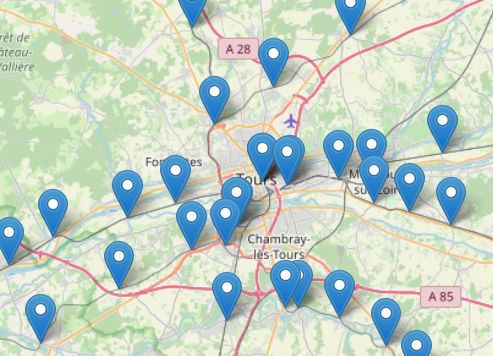

Pour cela, il vous faudra réaliser les étapes qui suivent:

1. Transformer la chaîne `csv` en tableau de *n-uplets nommés* (revoir le notebook 4 éventuellement),

2. Sélectionner les gares (enregistrements) pertinentes,

3. Ne conserver que les *descripteurs utiles* pour notre application (projection) - il y en a peu!suiventsuivent,

4. Transformer les données textes en données compatibles avec ipyleaflet (pré-traitement/conversion);

5. Utiliser *ipyleaflet* pour afficher les gares et leur nom.

À vous de compléter les sections correspondantes.

### Chaîne CSV vers tableau de n-uplets nommés

In [ ]:
def csv_vers_tableau(csv_str, sep=','): # valeur par défaut
    lignes = csv_str.split('\n')
    descripteurs = lignes[0].split(sep)
    liste_objs = [l.split(sep) for l in lignes[1:]]
    
    objets = []
    for o in liste_objs:
        objet = {}
        for d, v in zip(descripteurs, o):
            objet[d] = v
        objets.append(objet)
    return objets

tableau = csv_vers_tableau(csv, sep=";")
tableau[:2]

### Sélection des gares pertinentes

In [ ]:
# 1. Sélectionner les bonnes gares: utiliser le descripteur 'DEPARTEMENT' avec la valeur 'INDRE-ET-LOIRE'
selection1 = [ gare for gare in tableau if gare['DEPARTEMENT'] == 'INDRE-ET-LOIRE' ]
len(selection1)

In [ ]:
# 2. On veut seulement les gares de voyageurs
selection2 = [ gare for gare in selection1 if gare['VOYAGEURS'] == 'O']
len(selection2)

### Projection sur les descripteurs *utiles*

In [ ]:
# 3. projection: on veut juste les colonnes 'LIBELLE' et 'C_GEO'
projection = [ {d: v for d, v in g.items() if d in ['LIBELLE', 'C_GEO']} for g in selection2]
projection[:1]

### Adaptation de certains types...

In [ ]:
# 4. transformer la chaîne des coordonnées en tuple (float, float)
def coord(ch):
    x, y = ch.split(',')
    return (float(x), float(y))

gares = [ {d: coord(v) if d == 'C_GEO' else v for d, v in o.items()} for o in projection ]
gares

### Réalisation de la carte interactive

In [ ]:
# 5. constuire la carte et y ajouter un marqueur par gare
from ipyleaflet import Map, Marker

# recherche sur internet
tours = (47.383331, 0.68333)

# L'objet carte
carte = Map(center=tours, zoom=10)
display(carte) # display est une fonction spéciale des notebook

# Mettre les gares.
for gare in gares:
    marker = Marker(location=gare['C_GEO'], title=gare['LIBELLE'], draggable=False)
    carte.add_layer(marker)